## Simulazione dell'esame di Metodi Numerici


## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







In [5]:
from scipy.io import loadmat
import numpy as np

dati = loadmat('test_symI.mat')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

In [9]:
eig = np.linalg.eigvals(A)

print("A simmetrica?", np.all(A == A.T))
print("A def pos?", np.all(eig > 0))

A simmetrica? True
A def pos? True


Il teorema dice che per le matrici simmetriche e definite positive, la soluzione del sistema lineare Ax = b equivale a trovare il minimo della funzione f(x) = 1/2<Ax, x> - <b, x>

In [18]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    # inizializzare le variabili necessarie
    x = x0
    r = A@x - b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente per trovare la soluzione
    while errore >= tol and it < itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p) / (p.T@Ap)
        x = x + alpha * p
        vec_sol.append(x.copy())
        r= r + alpha * Ap 
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r 
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

In [20]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    x = x0
    r = A.dot(x) - b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it < itmax:
        it=it+1
        Ap=A.dot(p)
        alpha = -(r.T@p) / (p.T@Ap)
        x = x + alpha * p
        vec_sol.append(x.copy())
        rtr_old= r.T@r
        r= r + alpha * Ap
        gamma= (r.T@r) / rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

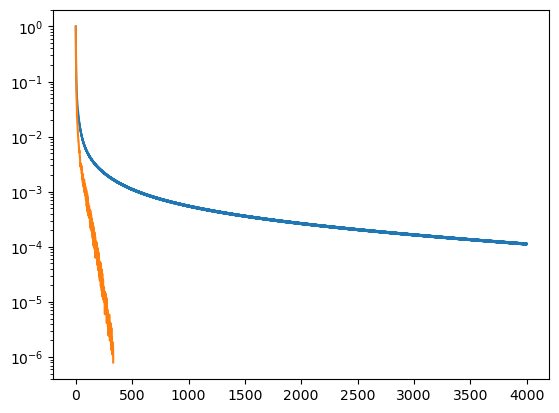

In [52]:
import matplotlib.pyplot as plt

tol = 1e-6
maxit = 4000
x0 = np.zeros_like(b)

x_g, vet_err_g, vet_x_g, it_g = steepestdescent(A, b, x0, maxit, tol)
x_gc, vet_err_gc, vet_x_gc, it_gc = conjugate_gradient(A, b, x0, maxit, tol)

plt.semilogy(np.arange(it_g + 1), vet_err_g, np.arange(it_gc + 1), vet_err_gc)
plt.show()

In [62]:
print("Indice di condizionamento A:", np.linalg.cond(A))

Indice di condizionamento A: 9999.999999996193


Poiché la matrice ha indice di condizionamento maggiore di 10^3, la matrice è mal condizionata e poiché il fattore di convergenza di steepest descent è data da (K(A) - 1) / (K(A) + 1), mentre per gradiente coniugato è (sqrt(K(A)) - 1) / (sqrt(K(A)) + 1). Tanto più è alto K(A), tanto più si avvicina a zero, quindi ha convergenza più lenta. Il metodo del gradiente coniugato è più veloce poiché dipende meno dall'indice di condizionamento.

In [91]:
A1=A+np.eye(A.shape[0])*0.05
x1 = np.ones_like(b)
b0 = np.zeros_like(b)
b1 = A1@x1

b1_g, vet_err_g1, vet_b1_g1, it_g1 = steepestdescent(invA1, b1, b0, maxit, tol)
b1_gc, vet_err_gc1, vet_b1_gc1, it_gc1 = conjugate_gradient(invA1, b1, b0, maxit, tol)

print("Condizionamento di A1:", np.linalg.cond(A1))

print("Iterazioni gradiente:", it_g1)
print("Iterazioni gradiente coniugato:", it_gc1)

Condizionamento di A1: 20.958083832335358
Iterazioni gradiente: 120
Iterazioni gradiente coniugato: 33


Poiché il fattore di convergenza di steepest descent è data da (K(A) - 1) / (K(A) + 1), mentre per gradiente coniugato è (sqrt(K(A)) - 1) / (sqrt(K(A)) + 1) e poiché la matrice A1 è ben condizionata, converge con un numero minore di passi.

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [134]:
import scipy as sp
from SolveTriangular import *

def eqnorm(A,b):
    G=A.T@A
    f=A.T@b
    L = sp.linalg.cholesky(G, lower=True)
    U = L.T
    y, flag = Lsolve(L, f)
    if flag == 0:
        x, flag = Usolve(U, y)
    return x

In [207]:
x =np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
y =np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59])

xx = np.linspace(1, 3, 200)

A = np.vander(x, 2, increasing=True)
pol = eqnorm(A, y)

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [210]:
def plagr(xnodi,j):
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
        xzeri=xnodi[1:]
    else:
        xzeri=np.append(xnodi[:j], xnodi[j + 1:])
    num= np.poly(xzeri)
    den= np.polyval(num, xnodi[j])
    p= num/den
    return p

In [211]:
def InterpL(x, y, xx):
    n=x.size
    m=xx.size 
    L=np.zeros((m,n))
    for j in range(n):
        p=plagr(x, j)
        L[:,j]=np.polyval(p, xx)
    return L@y

In [214]:
pol2 = InterpL(x, y, xx)

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

In [217]:
y2 = 2 * x + 1

pol3 = eqnorm(A, y2)
pol4 = InterpL(x, y2, xx)

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti$(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

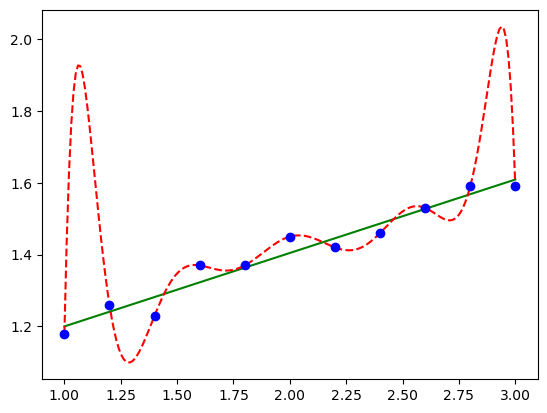

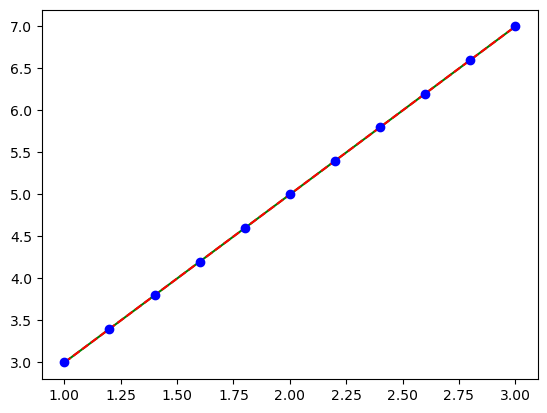

In [250]:
plt.plot(xx, np.polyval(np.flip(pol), xx), 'g-', xx, pol2, 'r--', x, y, 'bo')
plt.show()

plt.plot(xx, np.polyval(np.flip(pol3), xx), 'g-', xx, pol4, 'r--', x, y2, 'bo')
plt.show()

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

Si ha che nel primo caso l'errore non è nullo poiché la derivata k-esima della funzione è diversa da zero per ogni k da 0 a n + 1, mentre nel secondo caso l'errore è nullo poiché la derivata n + 1-esima della funzione è uguale a zero nel caso.

                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]
